## Question 3

### Question 3.1.

In [1]:
# Import the required libraries: 
import pandas as pd
import matplotlib.pyplot as plt

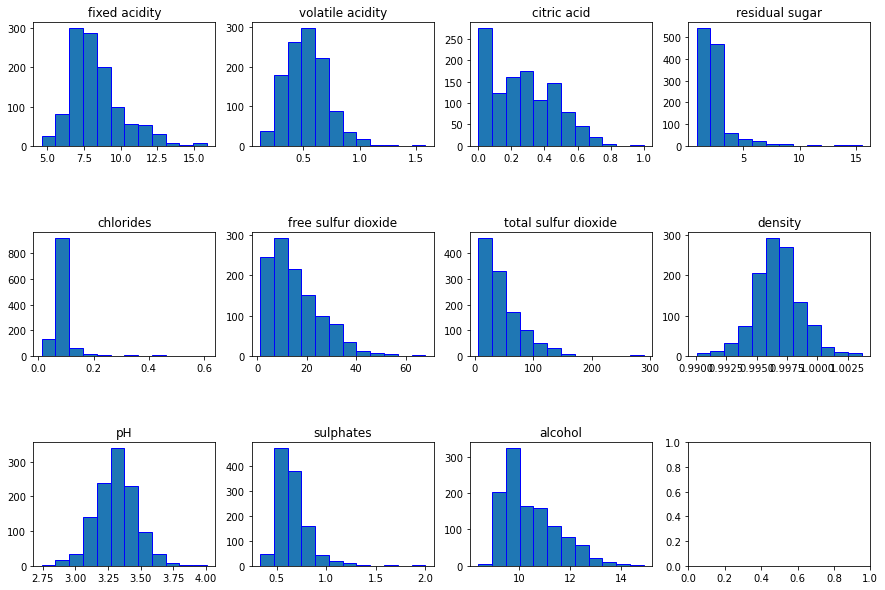

In [2]:
df = pd.read_csv('question_3.csv')

# Assigning the required columns:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
           'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Creating the matrix:
figure, axis = plt.subplots(3, 4, figsize=(15, 10))
figure.subplots_adjust(hspace=0.7)  # Adding some space between rows 

# Generate the histograms charts: 
for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    axis[row, col].hist(df[column], bins=12, edgecolor='blue')
    axis[row, col].set_title(column)

# Draw:
plt.show()


### Question 3.2.

### Most of the data are skewed to the right, except for density and pH they are normally distributed with no skewness. The skewness of the other variables is either high such as in chlorides and residual sugar, or low such as in fixed acidity. 

### Question 3.3.

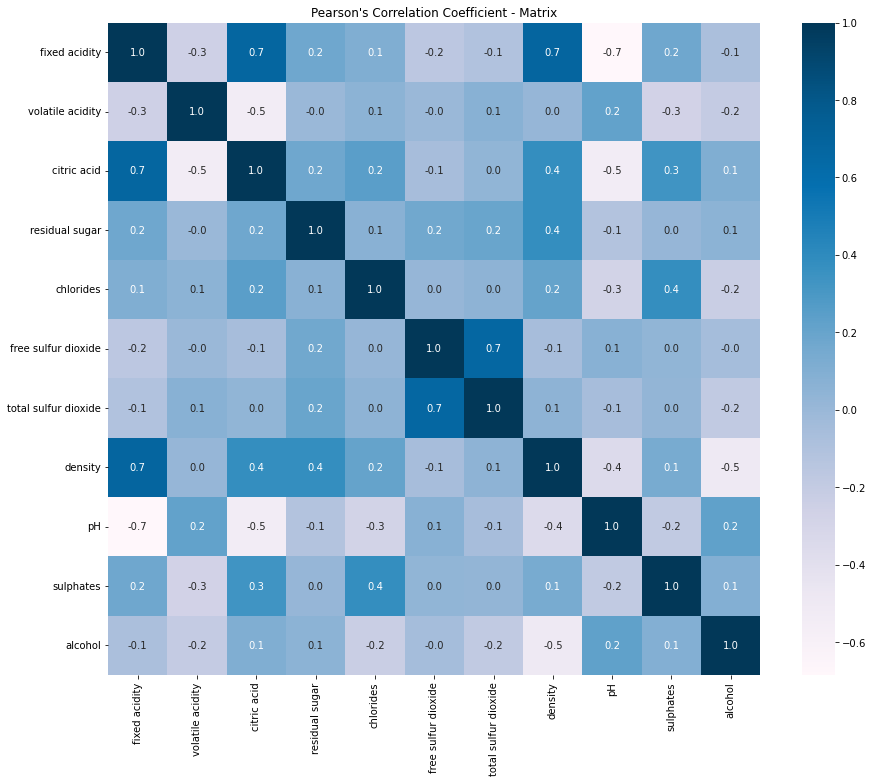

In [3]:
import seaborn as sns

# Determine the correlation coefficients:
correlation_matrix = df[columns].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='PuBu', square=True)

# Set the title and display the plot
plt.title("Pearson's Correlation Coefficient - Matrix")
plt.show()

### Question 3.4.

In [4]:
# Split the upper triangle part of the matrix:
upper_triangle = correlation_matrix.where(
    pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Determine the top 5 positive correlation pairs: 
positive_corr = upper_triangle.stack().nlargest(5)
print("The 5 top Variable Pairs with Positive Correlation:")
print(positive_corr)

# Get the top 5 variable pairs with negative correlation
negative_corr = upper_triangle.stack().nsmallest(5)
print("\nThe 5 top Variable Pairs with Negative Correlation:")
print(negative_corr)

The 5 top Variable Pairs with Positive Correlation:
fixed acidity        density                 0.681501
                     citric acid             0.673157
free sulfur dioxide  total sulfur dioxide    0.661093
residual sugar       density                 0.380147
citric acid          density                 0.375243
dtype: float64

The 5 top Variable Pairs with Negative Correlation:
fixed acidity     pH            -0.685163
citric acid       pH            -0.546339
volatile acidity  citric acid   -0.544187
density           alcohol       -0.494727
                  pH            -0.352775
dtype: float64


C:\Users\tasst\AppData\Local\Temp\ipykernel_21484\2379723661.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool)


### Question 3.5.

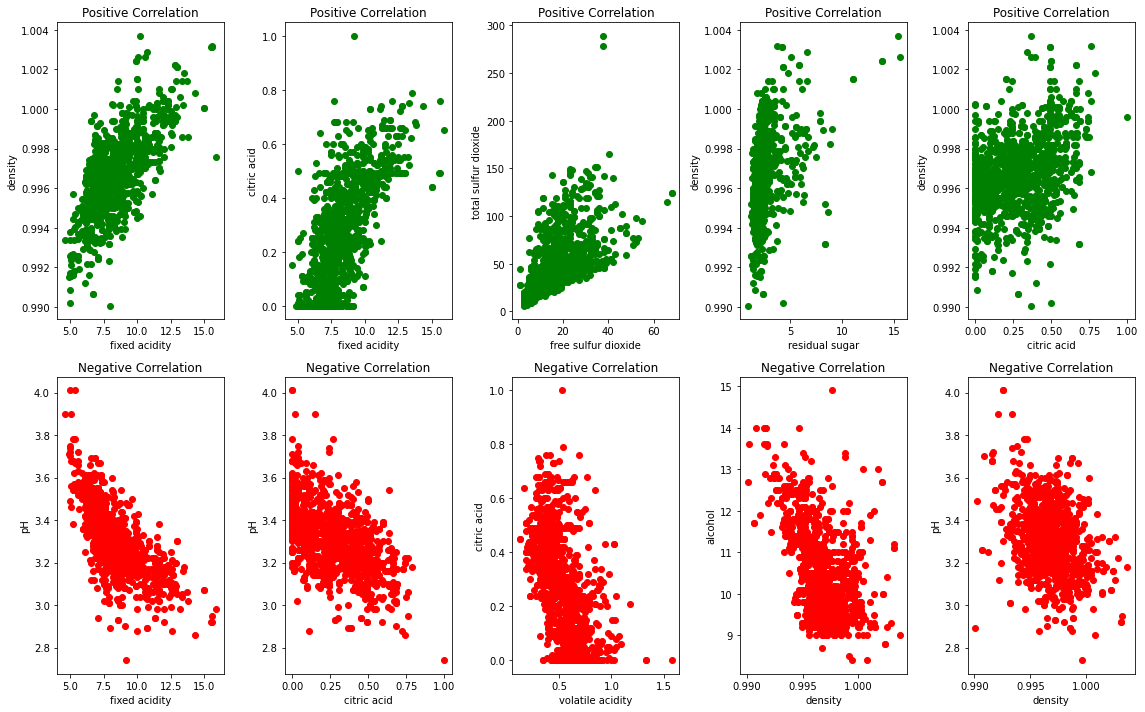

In [5]:
# Top 5 possitive correlation pairs: 
pstv_corr_pairs = [('fixed acidity', 'density'), ('fixed acidity', 'citric acid'), ('free sulfur dioxide', 'total sulfur dioxide'),
                       ('residual sugar', 'density'), ('citric acid', 'density')]

# Top 5 negative correlation pairs: 
ngtv_corr_pairs = [('fixed acidity', 'pH'), ('citric acid', 'pH'), ('volatile acidity', 'citric acid'),
                       ('density', 'alcohol'), ('density', 'pH')]

figure, axis = plt.subplots(2, 5, figsize=(16, 10))
figure.subplots_adjust(hspace=0.7, wspace=0.7)  # Adding some space between rows and columns

# Scatter plots for positive correlation pairs: 
for i, pair in enumerate(pstv_corr_pairs):
    row = 0
    col = i
    axis[row, col].scatter(df[pair[0]], df[pair[1]], color='g')
    axis[row, col].set_xlabel(pair[0])
    axis[row, col].set_ylabel(pair[1])
    axis[row, col].set_title('Positive Correlation')

# Scatter plots for negative correlation pairs: 
for i, pair in enumerate(ngtv_corr_pairs):
    row = 1
    col = i
    axis[row, col].scatter(df[pair[0]], df[pair[1]], color='r')
    axis[row, col].set_xlabel(pair[0])
    axis[row, col].set_ylabel(pair[1])
    axis[row, col].set_title('Negative Correlation')

# Draw the scatter plots:
plt.tight_layout()
plt.show()